In [299]:
import pandas as pd

In [300]:
air_quality = pd.read_csv('../data/air-quality-data.csv')

# rename columns
air_quality = air_quality.rename(columns={'Ár': 'year', 'Efni': 'chemical', 'Fjöldi gilda':'value','Styrkur í (µg/ m3)': 'concentration', 'Fjöldi yfir': 'exceedence value'})
air_quality = air_quality.replace('-', float('nan'))
# air_quality = air_quality.dropna()

In [301]:
# drop chemical name
air_quality = air_quality.drop(['chemical'], axis=1)

# every 7th row
no2 = air_quality.iloc[::6] # NO2
co = air_quality.iloc[1::6] # CO
o3 = air_quality.iloc[2::6] # O3
so2 = air_quality.iloc[3::6] # SO2
pm10 = air_quality.iloc[4::6] # PM10
h2s = air_quality.iloc[5::6] # H2S

In [336]:
pm10

,_id,year,value,concentration,exceedence value
4,5,1994,173,26,1
10,11,1995,197,31,2
16,17,1996,133,25,0
22,23,1997,207,25,1
28,29,1998,213,33,0
34,35,1999,225,33,2
40,41,2000,207,39,7
46,47,2001,196,19,0
52,53,2002,350,26,29
58,59,2003,365,19,16


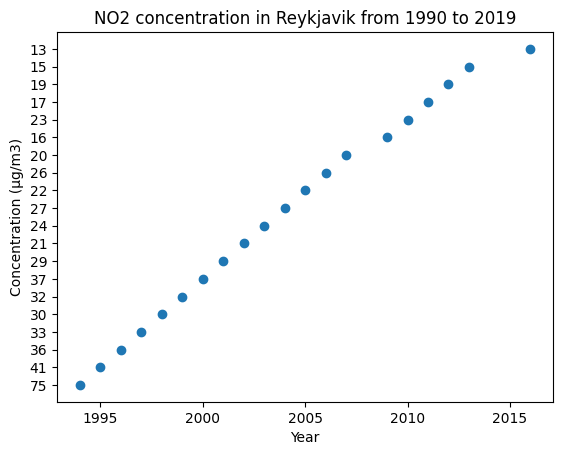

In [303]:
import matplotlib.pyplot as plt

# the year of the measurement of the outlier
outliers = [2008, 2015, 2014]

for outlier in outliers:
    no2 = no2[no2['year'] != outlier]

year = no2['year']
concentration = no2['concentration']

plt.scatter(year, concentration)
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m3)')
plt.title('NO2 concentration in Reykjavik from 1990 to 2019')
plt.show()

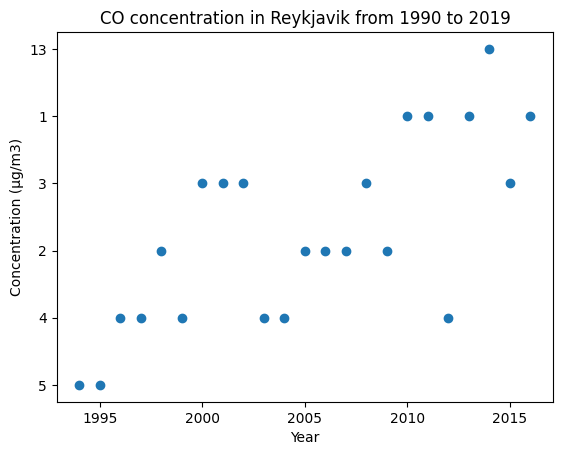

In [340]:
import matplotlib.pyplot as plt

# the year of the measurement of the outlier
outliers = []
data = so2.copy()
data = data.dropna()

for outlier in outliers:
    data = data[data['year'] != outlier]

year = data['year']
concentration = data['concentration']

plt.scatter(year, concentration)
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m3)')
plt.title('CO concentration in Reykjavik from 1990 to 2019')
plt.show()

In [304]:
traffic = pd.read_csv('../data/umferd_reykjavik_eftir_gotuheiti_heild.csv', sep=';')

# relevant roads
roads = ['Ár', 'Miklabraut', 'Bústaðavegur', 'Háaleitisbraut']
# rename
traffic = traffic[roads] 
traffic = traffic.rename(columns={'Ár': 'year'})
traffic
# only up to 2016 so that we can use the air quality data aswell
traffic = traffic[traffic['year'] <= 2016]

In [305]:
traffic

,year,Miklabraut,Bústaðavegur,Háaleitisbraut
0,1994,40023,36909,13580
1,1995,41749,35717,14285
2,1996,41696,36163,13118
3,1997,42868,36908,15309
4,1998,43602,37854,15400
5,1999,44022,39104,16335
6,2000,44306,40724,16589
7,2001,43680,39288,16327
8,2002,43230,40257,16038
9,2003,41713,39331,16926


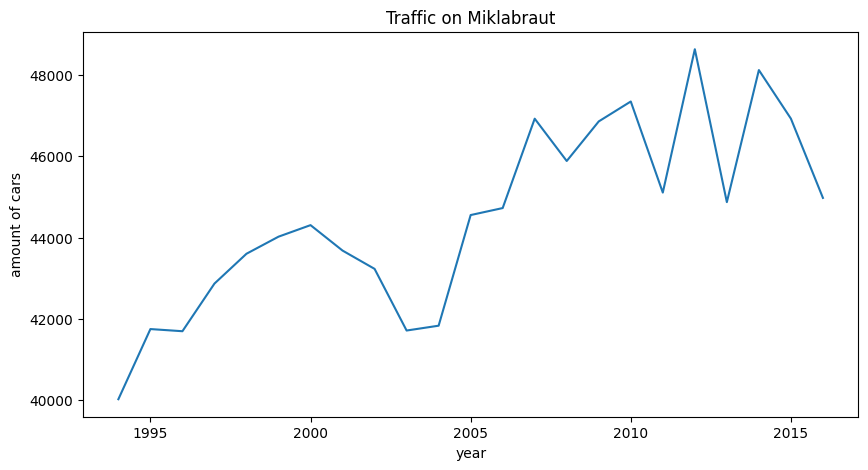

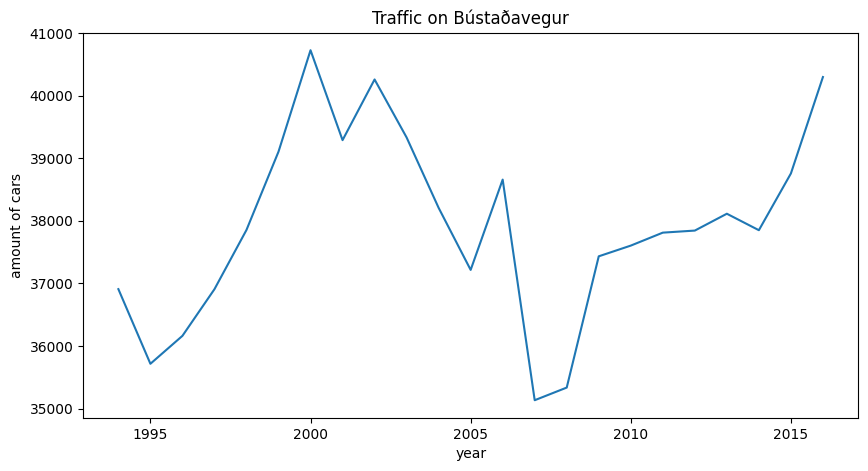

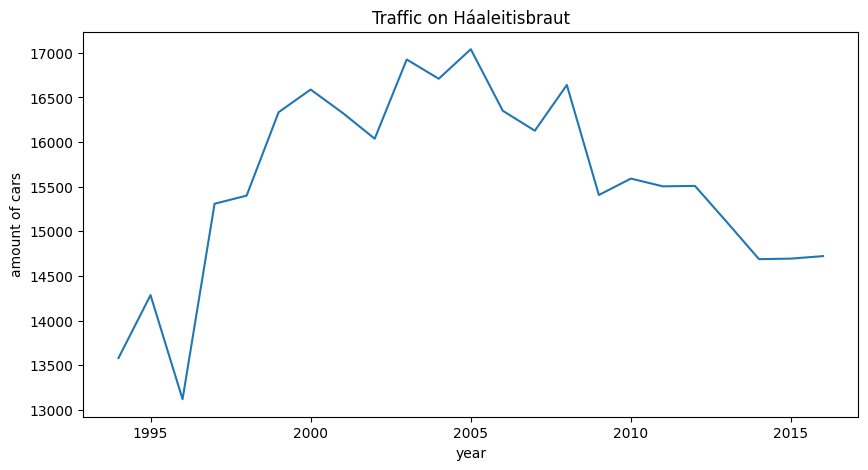

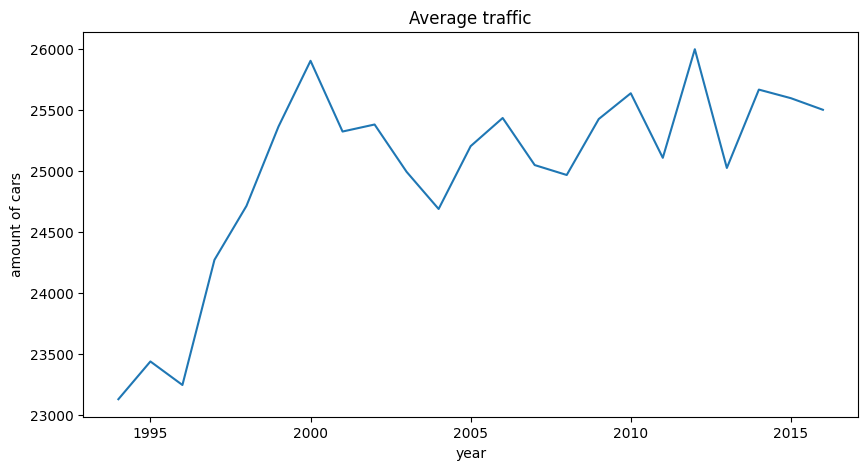

In [306]:
import matplotlib.pyplot as plt

for road_name in traffic:
    if road_name == 'year':
        continue
    
    traffic_on_road = traffic[road_name]
    year = traffic['year']

    plt.figure(figsize=(10, 5))

    plt.plot(year, traffic_on_road)
    plt.xlabel('year')
    plt.ylabel('amount of cars')
    plt.title('Traffic on ' + road_name)
    plt.show()

# average traffic

traffic_average = traffic.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(year, traffic_average)
plt.xlabel('year')
plt.ylabel('amount of cars')
plt.title('Average traffic')
plt.show()

In [307]:
data = no2.merge(traffic, on='year')
data ['average_traffic'] = traffic.mean(axis=1).astype(int)

data = data.reindex()
data

,_id,year,value,concentration,exceedence value,Miklabraut,Bústaðavegur,Háaleitisbraut,average_traffic
0,1,1994,11,75,3,40023,36909,13580,23126
1,7,1995,192,41,11,41749,35717,14285,23436
2,13,1996,221,36,1,41696,36163,13118,23243
3,19,1997,137,33,1,42868,36908,15309,24270
4,25,1998,209,30,0,43602,37854,15400,24713
5,31,1999,168,32,0,44022,39104,16335,25365
6,37,2000,162,37,1,44306,40724,16589,25904
7,43,2001,204,29,0,43680,39288,16327,25324
8,49,2002,331,21,0,43230,40257,16038,25381
9,55,2003,362,24,3,41713,39331,16926,24993


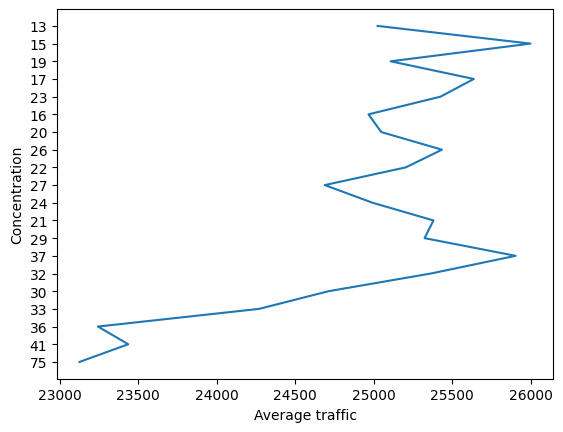

In [331]:
import matplotlib.pyplot as plt

plt.plot(data['average_traffic'], data['concentration'])
plt.xlabel('Average traffic')
plt.ylabel('Concentration')
plt.show()

In [316]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

X = data['average_traffic']
y = data['concentration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr = RandomForestRegressor()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-10.683133783783783

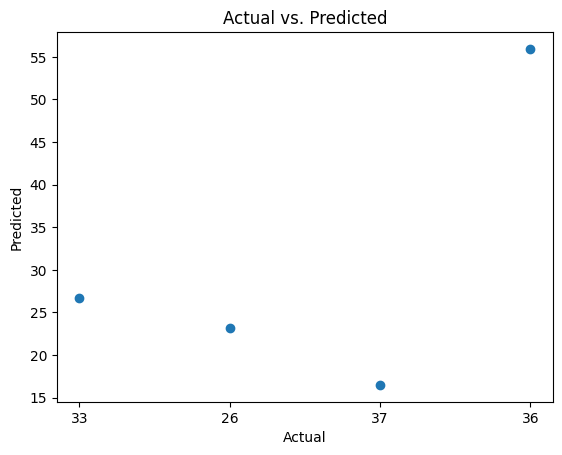

In [317]:
# Make predictions on the test data
y_pred = lr.predict(X_test)

# Plot the actual target values against the predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [318]:
input_data = data['average_traffic'].values.reshape(-1, 1)
input_data_scaled = scaler.transform(input_data)
output = lr.predict(input_data_scaled).astype(int)



print(output)

[55 47 55 26 28 28 16 28 23 21 26 21 23 18 17 23 19 18 16 16]
